<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_4_Modelos_Avanzados_y_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 4 MODELOS AVANZADOS**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: MODELOS AVANZADOS Y REDES NEURONALES
*   CARRERA: DATA SCIENCE

# Paso 1: Importación de librerías y preprocesamiento de datos



In [13]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento y modelado
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, classification_report
from sklearn.ensemble import RandomForestClassifier

# Para la red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Para el balanceo de clases
from imblearn.over_sampling import SMOTE

### Cargar los datos y realizar la preparación

In [2]:
# Cargar los datos
data = pd.read_csv('Customer Churn.csv')

# Mostrar las primeras filas del dataframe
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


# Paso 2: Análisis de la distribución de "Subscription Length" para cada clase

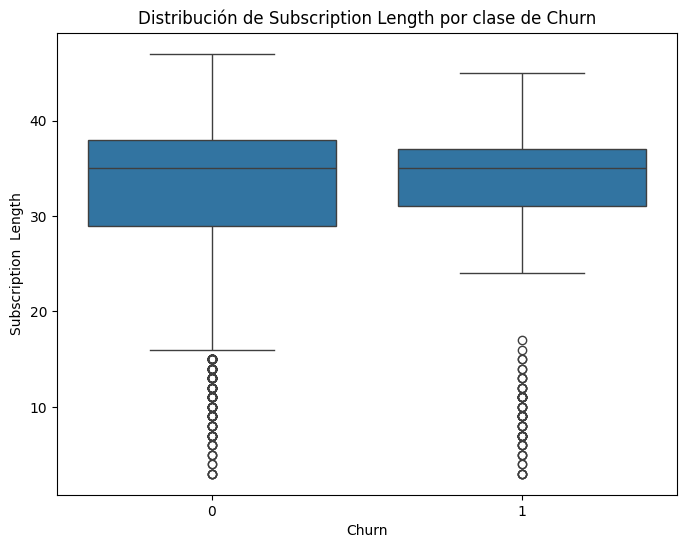

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2655.0,32.662524,8.392357,3.0,29.0,35.0,38.0,47.0
1,495.0,31.894949,9.469163,3.0,31.0,35.0,37.0,45.0


In [3]:
# Gráfico de caja para visualizar la distribución
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Subscription  Length', data=data)
plt.title('Distribución de Subscription Length por clase de Churn')
plt.show()

# Estadísticas descriptivas
data.groupby('Churn')['Subscription  Length'].describe()

**Explicación:**

Aquí analizamos cómo se distribuye la variable "Subscription Length" para cada clase de "Churn". Utilizamos un gráfico de caja para visualizar la dispersión y calculamos estadísticas descriptivas para observar diferencias en medias y medianas entre las clases. Esto nos ayuda a entender si "Subscription Length" influye en la decisión de un cliente de renunciar.

---

**Interpretación:**

- La media de "Subscription Length" es ligeramente menor para los clientes que renuncian (31.89) en comparación con los que no renuncian (32.66). Esto sugiere que los clientes con períodos de suscripción ligeramente más cortos tienden a renunciar con más frecuencia.

- La mediana es la misma para ambas clases (35 meses), lo que indica que el valor central de "Subscription Length" es similar independientemente de si el cliente renuncia o no.

- El percentil 25% es mayor para los clientes que renuncian (31.0) en comparación con los que no renuncian (29.0). Esto implica que un cuarto de los clientes que renuncian tienen al menos 31 meses de suscripción, mientras que un cuarto de los que no renuncian tienen menos de 29 meses.

- La desviación estándar es ligeramente mayor para los clientes que renuncian, lo que indica una mayor variabilidad en sus períodos de suscripción.

---

**Conclusión:**

Aunque hay diferencias sutiles en la distribución de "Subscription Length" entre las clases de "Churn", las diferencias no son muy pronunciadas. Esto sugiere que, si bien "Subscription Length" puede tener cierta incidencia en la renuncia de los clientes, probablemente no sea el único factor determinante. Será importante considerar esta variable en conjunto con otras en el modelo predictivo.

# Estandarización de las variables regresoras

In [5]:
# Separar variables predictoras y objetivo
X = data.drop('Churn', axis=1)
y = data['Churn']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame y mantener los nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

**Explicación:**

Estandarizamos las variables predictoras para que todas tengan una media de 0 y una desviación estándar de 1. Esto es importante para algoritmos sensibles a la escala de los datos y mejora la convergencia en modelos de redes neuronales.

# Paso 3: Frecuencia de cada clase y balanceo con SMOTE

In [6]:
# Contar la frecuencia de cada clase
print("Frecuencia de clases antes del balanceo:")
print(y.value_counts())

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42, stratify=y)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la frecuencia de clases después del balanceo
print("\nFrecuencia de clases después del balanceo:")
print(y_train_res.value_counts())

Frecuencia de clases antes del balanceo:
Churn
0    2655
1     495
Name: count, dtype: int64

Frecuencia de clases después del balanceo:
Churn
0    1778
1    1778
Name: count, dtype: int64


- Esto indica que la clase 0 representa aproximadamente el 84% del conjunto de datos, mientras que la clase 1 representa el 16%. Hay un desequilibrio significativo que podría sesgar los resultados del modelo hacia la clase mayoritaria.

- Ahora tenemos un conjunto de entrenamiento equilibrado con un número igual de muestras para cada clase. Esto debería mejorar el rendimiento del modelo al prevenir el sesgo hacia la clase mayoritaria.

Ahora que hemos balanceado las clases en el conjunto de entrenamiento, procedamos al Paso 4.

# Paso 4: Entrenamiento del modelo RandomForest y evaluación


A continuación, entrenaremos un modelo RandomForest con los hiperparámetros por defecto y evaluaremos su rendimiento en el conjunto de prueba. También extraeremos las siete características más importantes según el modelo.

In [7]:
# Entrenar el modelo RandomForest con los datos balanceados
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Mostrar el reporte de clasificación
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred))

# Calcular el F1-Score para ambas clases
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1-Score para la clase 0 (No renuncia): {f1_class_0:.2f}")
print(f"F1-Score para la clase 1 (Renuncia): {f1_class_1:.2f}")

# Obtener las importancias de las características
importances = rf_model.feature_importances_
feature_names = X_train_res.columns

# Crear un DataFrame de importancias
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar por importancia descendente
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Mostrar las siete características más importantes
top_features = feature_importances.head(7)
print("\nSiete características más importantes según el modelo RandomForest:")
print(top_features)

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       877
           1       0.83      0.94      0.88       163

    accuracy                           0.96      1040
   macro avg       0.91      0.95      0.93      1040
weighted avg       0.96      0.96      0.96      1040

F1-Score para la clase 0 (No renuncia): 0.98
F1-Score para la clase 1 (Renuncia): 0.88

Siete características más importantes según el modelo RandomForest:
                    Feature  Importance
10                   Status    0.157459
5          Frequency of use    0.130344
1                 Complains    0.124505
4            Seconds of Use    0.124258
2      Subscription  Length    0.107496
12           Customer Value    0.082213
7   Distinct Called Numbers    0.080487


**Explicación:**

- El modelo RandomForest muestra un excelente rendimiento general con una exactitud del 96%.
- La F1-Score es muy alta para ambas clases, lo que indica un buen equilibrio entre precisión y recall.
- La clase minoritaria (Renuncia) tiene una F1-Score de 0.88, lo cual es muy positivo dado que es la clase de interés.

**Siete características más importantes según el modelo RandomForest:**

1. Status (Importancia: 0.157459)
2. Frequency of use (Importancia: 0.130344)
3. Complains (Importancia: 0.124505)
4. Seconds of Use (Importancia: 0.124258)
5. Subscription Length (Importancia: 0.107496)
6. Customer Value (Importancia: 0.082213)
7. Distinct Called Numbers (Importancia: 0.080487)

Estas características serán cruciales para entrenar nuestro modelo de red neuronal.

# Paso 5: Entrenamiento de una red neuronal feedforward con las siete características más importantes

Ahora, utilizaremos las siete características más importantes para entrenar un modelo de red neuronal feedforward con una capa oculta. Nuestro objetivo es ajustar los hiperparámetros de manera que la métrica AUC sea mayor al 90%.

**Preparación de los datos**

In [9]:
# Filtrar el conjunto de entrenamiento y prueba con las siete características más importantes
selected_features = ['Status', 'Frequency of use', 'Complains', 'Seconds of Use',
                     'Subscription  Length', 'Customer Value', 'Distinct Called Numbers']

# Conjunto de entrenamiento
X_train_selected = X_train_res[selected_features]
y_train_selected = y_train_res

# Conjunto de prueba
X_test_selected = X_test[selected_features]
y_test_selected = y_test

**Explicación:**

- Hemos seleccionado las siete características más importantes identificadas por el modelo RandomForest.
- Creamos nuevos conjuntos de entrenamiento y prueba que sólo incluyen estas características.


**Construcción y entrenamiento del modelo de red neuronal**

In [11]:
# Definir el modelo de red neuronal
model = Sequential()

# Capa oculta con 16 neuronas y función de activación 'relu'
model.add(Dense(16, activation='relu', input_shape=(X_train_selected.shape[1],)))

# Capa de salida con función de activación 'sigmoid' para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Definir el optimizador SGD con una tasa de aprendizaje inicial
learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)

# Compilar el modelo con función de pérdida 'binary_crossentropy' y métrica 'AUC'
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

# Definir EarlyStopping para prevenir sobreajuste
early_stopping = EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

# Entrenar el modelo
epochs = 100
batch_size = 32

history = model.fit(X_train_selected, y_train_selected,
                    validation_data=(X_test_selected, y_test_selected),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - AUC: 0.6430 - loss: 0.6833 - val_AUC: 0.8244 - val_loss: 0.5446
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8213 - loss: 0.5263 - val_AUC: 0.8670 - val_loss: 0.5082
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8680 - loss: 0.4836 - val_AUC: 0.8962 - val_loss: 0.4768
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8976 - loss: 0.4389 - val_AUC: 0.9056 - val_loss: 0.4478
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9144 - loss: 0.3954 - val_AUC: 0.9099 - val_loss: 0.4202
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.9142 - loss: 0.3865 - val_AUC: 0.9148 - val_loss: 0.4031
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9268 - loss: 0.3630 - val_AUC: 0.9196 - val_loss: 0.3903
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9281 - loss: 0.3641 - val_AUC: 0.9218 - val_loss: 0.3821
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9278 - loss: 0.3577 - val_AUC: 0.9222 - val_loss: 0.3759
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC:

**Explicación:**

- **Arquitectura del modelo:**
 - Una capa oculta con 16 neuronas y función de activación ReLU.
 - Una capa de salida con una neurona y función de activación sigmoide para realizar la clasificación binaria.
- **Hiperparámetros:**
 - Tasa de aprendizaje: Comenzamos con 0.01. Podemos ajustar este valor si es necesario.
 - Número de épocas: Establecemos 100 épocas, pero utilizamos EarlyStopping para detener el entrenamiento si el modelo deja de mejorar.
 - Batch size: Usamos 32, que es un valor comúnmente utilizado.
- **Optimización:**
 - Usamos el Descenso de Gradiente Estocástico (SGD) como optimizador, tal como se solicitó.
- Callbacks:
 - Implementamos EarlyStopping para prevenir el sobreajuste y restaurar los pesos de la mejor época.

**Evaluación del modelo y curva ROC**

AUC en el conjunto de prueba: 0.9425
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
AUC calculado manualmente: 0.9426


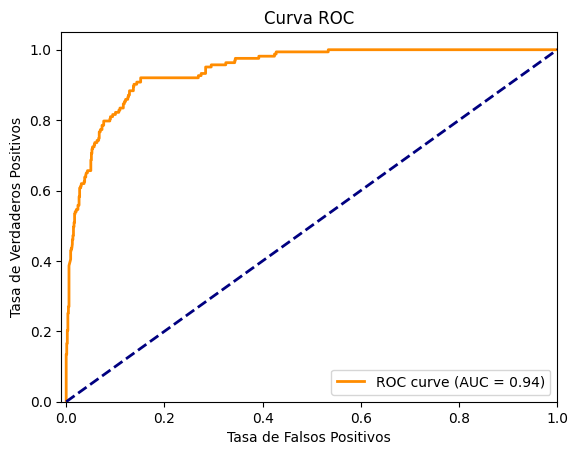

In [12]:
# Evaluación del modelo en el conjunto de prueba
results = model.evaluate(X_test_selected, y_test_selected, verbose=0)
print(f"AUC en el conjunto de prueba: {results[1]:.4f}")

# Obtener predicciones de probabilidad
y_pred_prob = model.predict(X_test_selected).ravel()

# Calcular la curva ROC y el AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_selected, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Mostrar el AUC
print(f"AUC calculado manualmente: {roc_auc:.4f}")

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.00])
plt.ylim([0.00, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Explicación:**

- Evaluamos el modelo en el conjunto de prueba y obtenemos el AUC.
- Calculamos manualmente la curva ROC y el AUC utilizando Scikit-Learn para verificar los resultados.
- Graficamos la curva ROC para visualizar el rendimiento del modelo.

**Ejemplo de ajuste con más neuronas y Dropout**

In [14]:
# Definir el modelo ajustado
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_selected.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
learning_rate = 0.005
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

# Entrenar el modelo con EarlyStopping
history = model.fit(X_train_selected, y_train_selected,
                    validation_data=(X_test_selected, y_test_selected),
                    epochs=200,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.7451 - loss: 0.6141 - val_AUC: 0.9042 - val_loss: 0.5727
Epoch 2/200
 39/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8814 - loss: 0.5114   

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8820 - loss: 0.5032 - val_AUC: 0.9126 - val_loss: 0.5226
Epoch 3/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9029 - loss: 0.4509 - val_AUC: 0.9138 - val_loss: 0.4898
Epoch 4/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9097 - loss: 0.4276 - val_AUC: 0.9141 - val_loss: 0.4634
Epoch 5/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9111 - loss: 0.4107 - val_AUC: 0.9143 - val_loss: 0.4417
Epoch 6/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9122 - loss: 0.3956 - val_AUC: 0.9145 - val_loss: 0.4265
Epoch 7/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9152 - loss: 0.3866 - val_AUC: 0.9145 - val_loss: 0.4149
Epoch 8/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9220 - loss: 0.3681 - val_AUC: 0.9150 - val_loss: 0.4053
Epoch 9/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9204 - loss: 0.3667 - val_AUC: 0.9154 - val_loss: 0.3980
Epoch 10/200
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC:

**Explicación:**

- Aumentamos el número de neuronas a 32 en la capa oculta.
- Agregamos una capa Dropout con una tasa del 20% para prevenir el sobreajuste.
- Reducimos la tasa de aprendizaje a 0.005 para un ajuste más fino.
- Incrementamos el número de épocas a 200, manteniendo EarlyStopping para detener el entrenamiento cuando sea adecuado.

**Monitoreo de las curvas de entrenamiento**

Es útil visualizar las curvas de entrenamiento y validación para la pérdida y la métrica AUC:

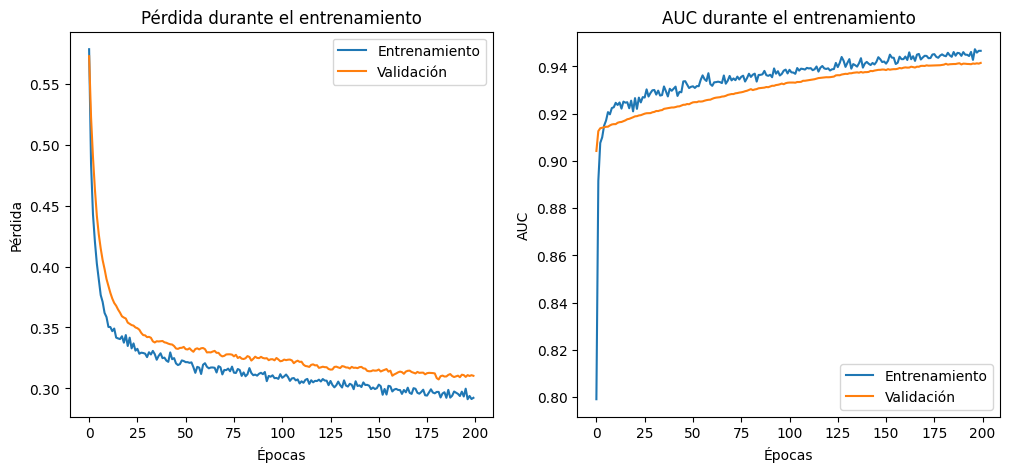

In [18]:
# Graficar la pérdida y el AUC durante el entrenamiento
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['AUC'], label='Entrenamiento')
plt.plot(history.history['val_AUC'], label='Validación')
plt.title('AUC durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('AUC')
plt.legend()

plt.show()

**Explicación:**

- Estas gráficas nos permiten observar si el modelo está mejorando y si existe sobreajuste.
- Si la pérdida de validación comienza a aumentar mientras que la pérdida de entrenamiento sigue disminuyendo, es una señal de sobreajuste.

# Resumen y próximos pasos
- **Objetivo:** Entrenar un modelo de red neuronal que alcance un AUC mayor al 90%.
- **Acciones tomadas:**
 - Seleccionamos las siete características más importantes.
 -  Construimos un modelo de red neuronal feedforward con una capa oculta.
 - Ajustamos los hiperparámetros manualmente para mejorar el rendimiento.
 - Utilizamos técnicas como Dropout y EarlyStopping para mejorar la generalización.